In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
d1=pd.DataFrame(pd.read_csv("./files/placement (1).csv"))
d1.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


Text(0.5, 1.0, 'CGPA VS PACKAGE')

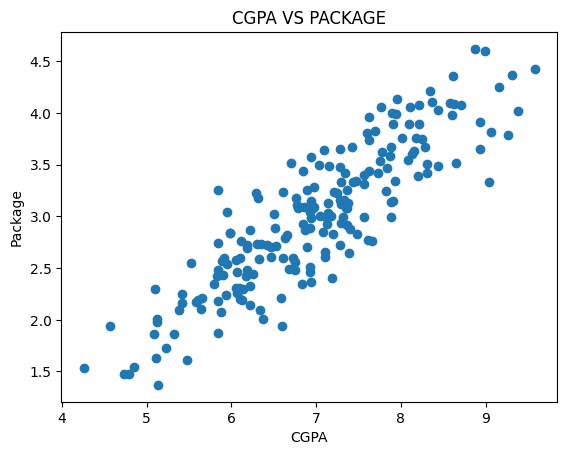

In [14]:
plt.scatter(x=d1["cgpa"],y=d1["package"])
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.title("CGPA VS PACKAGE")

In [15]:
x=d1[["cgpa"]]
y=d1["package"]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(x_train,y_train)

LinearRegression()

In [9]:
y_pred=lr.predict(x_test)
y_pred

array([3.89111601, 3.09324469, 2.38464568, 2.57434935, 1.6537286 ,
       1.77647803, 2.07219258, 2.93143862, 3.76278706, 2.93701814,
       4.09197872, 3.51170867, 2.97049525, 2.40138424, 3.18809652,
       3.46707251, 1.94386362, 3.24389172, 2.97607477, 3.41685683,
       2.55761079, 3.16577844, 2.85890486, 3.12114229, 3.68467378,
       2.8700639 , 3.49497011, 3.34432308, 3.91901361, 1.96060218,
       3.65119666, 3.2104146 , 3.74046898, 2.7863711 , 2.78079158,
       3.27178932, 3.52844723, 2.61340599, 2.65804215, 2.71383735])

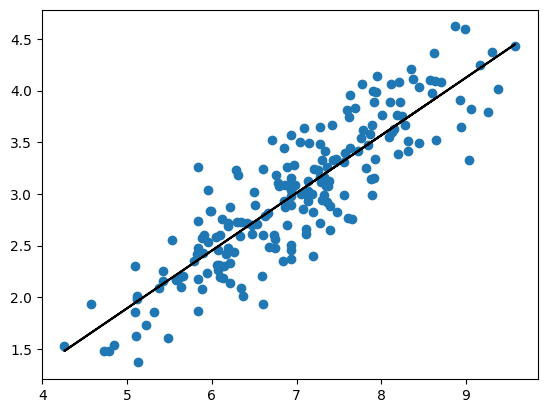

In [22]:
plt.scatter(d1["cgpa"],d1["package"])
plt.plot(x_train,lr.predict(x_train),color="black")

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
MAE=mean_absolute_error(y_test,y_pred)
MAE

0.2884710931878175

In [25]:
MSE=mean_squared_error(y_test,y_pred)
MSE

0.12129235313495527

In [27]:
RMSE=np.sqrt(MSE)
RMSE

0.34827051717731616

In [28]:
from sklearn.metrics import r2_score

In [29]:
ans=r2_score(y_test,y_pred)
ans

0.780730147510384

In [30]:
x_test.shape

(40, 1)

In [31]:
adjusted_r2_score=1-((1-ans)*(40-1)/(40-1-1))
#ans=r2_score from above,
#in denominator 40rows (rows-1 -col) it is to adjust r2score

0.7749598882343415

Add one more column of random  numbers in placement dataset and then re train dataset with new col

In [32]:
new_d1=d1.copy()

In [33]:
new_d1.shape #so we have to add 200 random numbers

(200, 2)

In [34]:
new_d1["new_col"]=np.random.random(200)


In [35]:
new_d1.head()

,cgpa,package,new_col
0,6.89,3.26,0.142392
1,5.12,1.98,0.019508
2,7.82,3.25,0.892896
3,7.42,3.67,0.459834
4,6.94,3.57,0.110795


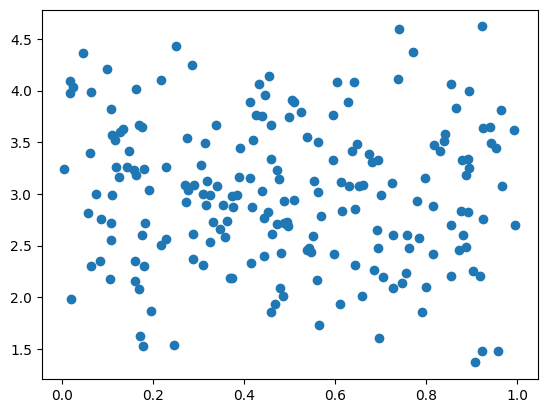

In [45]:
#now we have to plot scatter plot of new_col and package
plt.scatter(new_d1["new_col"],new_d1["package"])

In [46]:
x1=new_d1[["cgpa","new_col"]]
y1=new_d1["package"]
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=3)

In [47]:
lr=LinearRegression()


In [48]:
lr.fit(x1_train,y1_train)

LinearRegression()

In [49]:
y_pred=lr.predict(x1_test)

In [52]:
ans1=r2_score(y1_test,y_pred)
ans1

0.659209477787613

In [54]:
x1_test.shape

(40, 2)

In [55]:
adjusted_r2_score=1-((1-ans1)*(40-1)/(40-1-2))

#r2score is >=75% it means model is good fit 

0.6407883684788354

There can be questions aswell, where copy same datafram, **now add col IQ which should have values which are greater than package values and then retrain the model again , on two dependent variables (cgpa, iq) on package (indepedent variable)**

In [56]:
d2=d1.copy()

In [60]:
d2["iq"]=d2["package"] + (np.random.randint(-15,13,200)/10)
d2.head()

,cgpa,package,iq
0,6.89,3.26,3.86
1,5.12,1.98,1.48
2,7.82,3.25,2.25
3,7.42,3.67,2.47
4,6.94,3.57,4.47


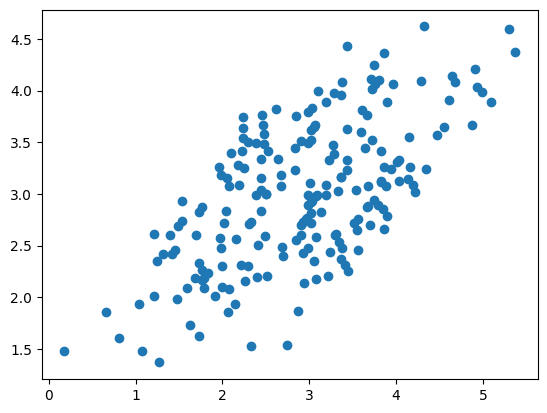

In [61]:
plt.scatter(data=d2,x="iq",y="package")

In [62]:
x2=d2[["cgpa","iq"]]
y2=d2["package"]
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=3)

In [63]:
lr=LinearRegression()
lr.fit(x2_train,y2_train)

LinearRegression()

In [65]:
y_pred2=lr.predict(x2_test)
y_pred2

array([4.34370805, 4.19869551, 3.07297322, 3.26693171, 2.66912894,
       2.11863597, 3.21220532, 2.37631644, 2.17139999, 3.69131854,
       3.11701581, 3.69850791, 3.15964692, 2.4095026 , 4.09719372,
       2.78019627, 2.91027663, 3.16873011, 2.93689029, 2.98516476,
       3.48342555, 1.84155025, 4.20413325, 2.684645  , 2.31175035,
       3.27979999, 3.43473727, 1.81305927, 2.933519  , 3.32499384,
       3.19854498, 2.52322281, 2.3889791 , 3.13206858, 3.95796162,
       2.30473106, 3.13886575, 3.42037247, 2.7462536 , 2.40245031])

In [66]:
ans2=r2_score(y2_test,y_pred2)
ans2

0.710999947452224

In [67]:
adjust_r2score=1-((1-ans2)*(40-1)/(40-1-2))
adjust_r2score

0.695378322990182

In [70]:
m=lr.coef_
b=lr.intercept_
m,b

(array([0.52816069, 0.11182639]), -1.0264334099224293)